## 야후주식 모듈을 활용한 주가 예측

#### 1. 원하는 주식 종목 명을 적어서 데이터를 불러온다

In [5]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

%matplotlib inline
yf.pdr_override()

In [6]:
start_date = '2020-01-01'
end_date = datetime.today().strftime("%Y-%m-%d")             # 현재 날짜 가져오기


hyundai = web.get_data_yahoo("005380.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [7]:
hyundai.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,121000.0,121000.0,118000.0,118000.0,107800.984375,556532
2020-01-03,118500.0,119000.0,115000.0,116000.0,105973.859375,1145187
2020-01-06,116000.0,117000.0,115500.0,116000.0,105973.859375,334574
2020-01-07,116500.0,117000.0,115500.0,115500.0,105517.078125,674196
2020-01-08,115000.0,115500.0,111500.0,112000.0,102319.585938,1044825


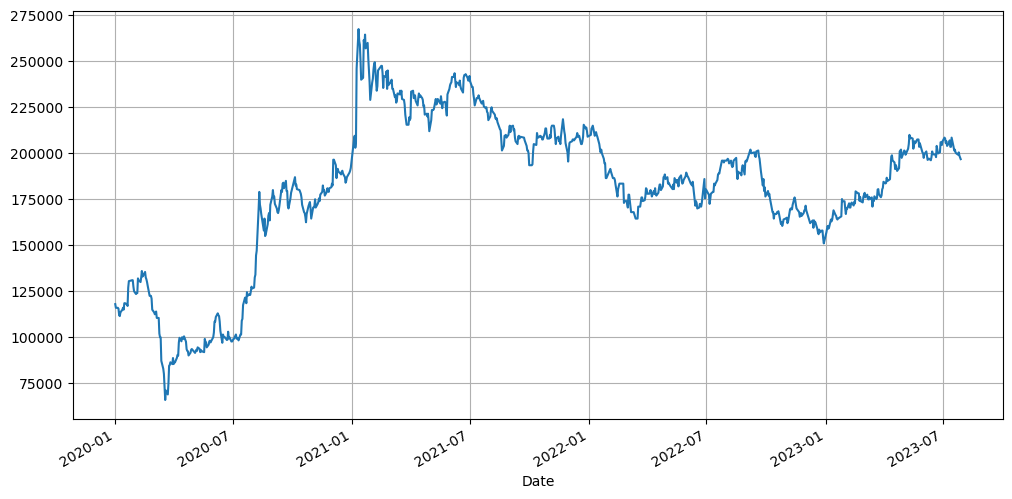

In [9]:
hyundai["Close"].plot(figsize=(12,6), grid=True);

#### 2. 불러온 주식 데이터를 prophet 데이터프레임 형식에 맞게 바꾼다.
    - 필요한 컬럼은 ds, y 2개!(컬럼 이름을 맞춰야함) 

In [10]:
df = pd.DataFrame({"ds":hyundai.index, "y":hyundai['Close']})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2020-01-02,118000.0
1,2020-01-03,116000.0
2,2020-01-06,116000.0
3,2020-01-07,115500.0
4,2020-01-08,112000.0


- 예측값의 상한과 하한을 제어해야 하면 cap, floor 컬럼에 값 지정
```
df['cap'] = 6
df['floor'] = 1.5
```

#### 3. forecast, Prophet 준비

In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

13:53:25 - cmdstanpy - INFO - Chain [1] start processing
13:53:25 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
968,2023-10-22,217763.889766,203052.472396,232546.805253
969,2023-10-23,218588.098988,202766.170475,234894.375305
970,2023-10-24,219391.175169,205190.005837,234239.846509
971,2023-10-25,219370.347865,205384.899647,235528.163160
972,2023-10-26,219070.085801,204521.527532,234833.555471


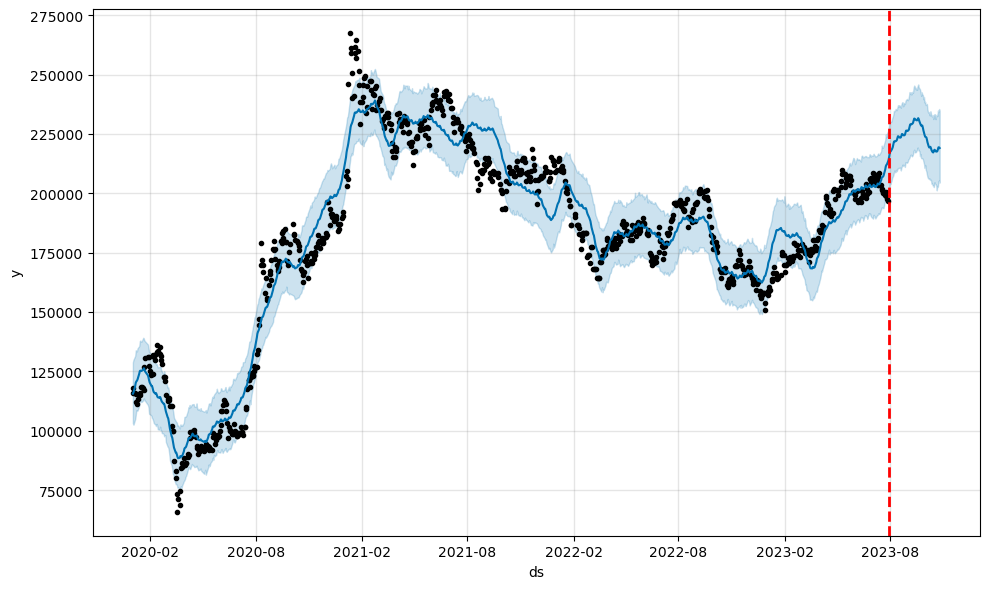

In [35]:
m.plot(forecast);
plt.axvline(datetime.today(), color='red', linestyle='--', linewidth=2);
#plt.axvline(2020, color='red', linestyle='--', linewidth=2);